<a href="https://colab.research.google.com/github/ScottCoffin/PFAS-Analysis-and-Intervention/blob/master/HexChromeMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Setup**

In [ ]:
#check R version
R.version.string

[1] "R version 4.0.4 (2021-02-15)"

In [ ]:
# if needed, install google drive mount capability
install.packages("googledrive")
library("googledrive") #mount google drive
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}
# authorize google drive
drive_auth(use_oob = TRUE, cache = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gargle’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘R.oo’, ‘R.methodsS3’


Loading required package: R.oo

Loading required package: R.methodsS3

R.methodsS3 v1.8.1 (2020-08-26 16:20:06 UTC) successfully loaded. See ?R.methodsS3 for help.

R.oo v1.24.0 (2020-08-26 16:11:58 UTC) successfully loaded. See ?R.oo for help.


Attaching package: ‘R.oo’


The following object is masked from ‘package:R.methodsS3’:

    throw


The following objects are masked from ‘package:methods’:

    getClasses, getMethods


The following objects are masked from ‘package:base’:

    attach, detach, load, save


R.utils v2.10.1 (2020-08-26 22:50:31 UTC) successfully loaded. See ?R.utils for help.


Attaching package: ‘R.utils’


The following object is masked from ‘package:utils’:

    timestamp


The following objects ar

Enter authorization code: 4/1AY0e-g7B53Mf-UEmw8_AMTTUojCLlhT9KGu0Nu4rPhkVPhQCL5CsVYF2gBw


# Libraries

In [ ]:
## If package is not installed, run install.package("package")
#install.packages("skimr")
install.packages("foreign") 
install.packages("memisc") #STATA data helper
install.packages("gridExtra")

# call package using library()
library(skimr) #easy summary of data
library(tidyverse) #general data manipulation
library(foreign)
library(memisc)
library(gridExtra) #arrange plots

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks R.utils::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()

Loading required package: lattice

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘memisc’


The following objects are masked from ‘package:dplyr’:

    collect, recode, rename, syms


The following object is masked fr

# Read in Data

In [ ]:
#library(memisc)
df <- read.dta("https://files.asmith.ucdavis.edu/USNews_A3.dta")
#summarize data
summary(df)

   college            frosh_ret         accept          enroll    
 Length:85          Min.   :53.00   Min.   :10.00   Min.   : 341  
 Class :character   1st Qu.:76.00   1st Qu.:41.00   1st Qu.:1202  
 Mode  :character   Median :84.00   Median :59.00   Median :1738  
                    Mean   :82.31   Mean   :56.28   Mean   :1865  
                    3rd Qu.:91.00   3rd Qu.:74.00   3rd Qu.:2324  
                    Max.   :98.00   Max.   :90.00   Max.   :4952  
  small_class    
 Min.   : 23.00  
 1st Qu.: 59.00  
 Median : 66.00  
 Mean   : 65.08  
 3rd Qu.: 72.00  
 Max.   :100.00  

In [ ]:
#examine data propertiers
attributes(df)

$datalabel
[1] ""

$time.stamp
[1] "16 Feb 2012 23:44"

$names
[1] "college"     "frosh_ret"   "accept"      "enroll"      "small_class"

$formats
[1] "%46s"  "%9.0g" "%9.0g" "%8.0g" "%9.0g"

$types
[1]  46 254 254 252 254

$val.labels
[1] "" "" "" "" ""

$var.labels
[1] "School/Location"                                    
[2] "Percent of freshmen retained into the second year"  
[3] "College acceptance rate"                            
[4] "Total enrollment"                                   
[5] "Percent of classes that have fewer than 20 students"

$row.names
 [1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10" "11" "12" "13" "14" "15"
[16] "16" "17" "18" "19" "20" "21" "22" "23" "24" "25" "26" "27" "28" "29" "30"
[31] "31" "32" "33" "34" "35" "36" "37" "38" "39" "40" "41" "42" "43" "44" "45"
[46] "46" "47" "48" "49" "50" "51" "52" "53" "54" "55" "56" "57" "58" "59" "60"
[61] "61" "62" "63" "64" "65" "66" "67" "68" "69" "70" "71" "72" "73" "74" "75"
[76] "76" "77" "78" "79" "80" "81" "82" "83" "84" "85"

$version
[1] 12

$class
[1] "data.frame"

Scatterplot

`geom_smooth()` using formula 'y ~ x'



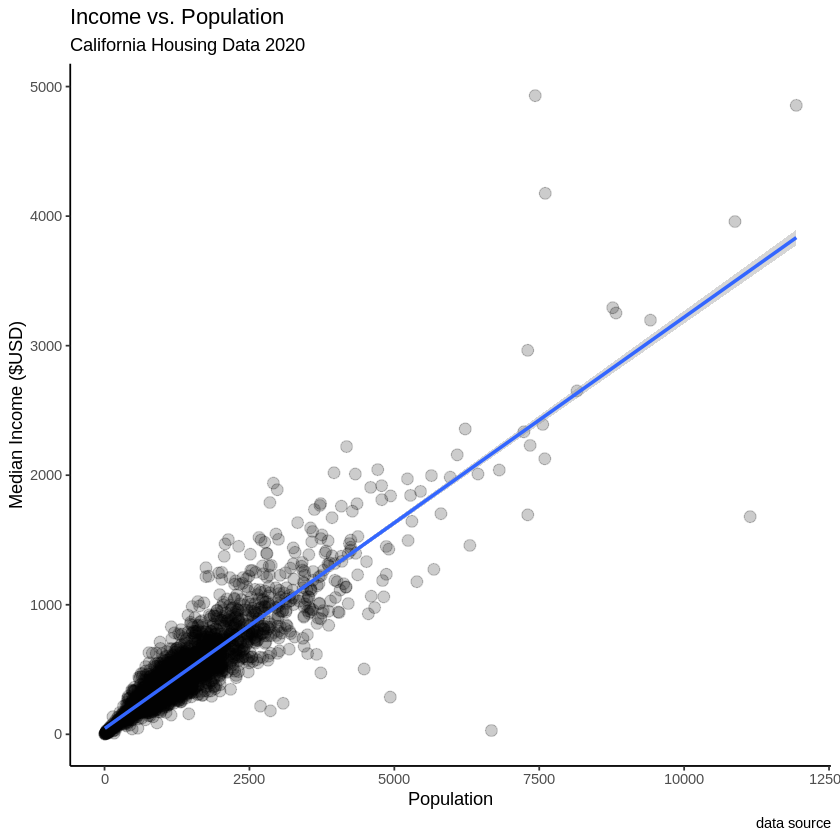

In [ ]:
#create a scatterplot
income_population <- df %>% #dataframe
ggplot(aes(x= population, y = households)) +
  geom_point(size = 3, alpha = 0.2) + #alpha provides transparency  
  geom_smooth(method = lm) + #adds linear regression line 
  labs(x = "Population", #labels
       y = "Median Income ($USD)",
       title = "Income vs. Population",
       subtitle = "California Housing Data 2020",
       caption = "data source") +
  theme_classic()  #theme with only axes present
  
income_population #print

R has many native options available for colors. See [cheatsheet](https://www.nceas.ucsb.edu/sites/default/files/2020-04/colorPaletteCheatsheet.pdf) for inspiration.
To change colors of 

`geom_smooth()` using formula 'y ~ x'



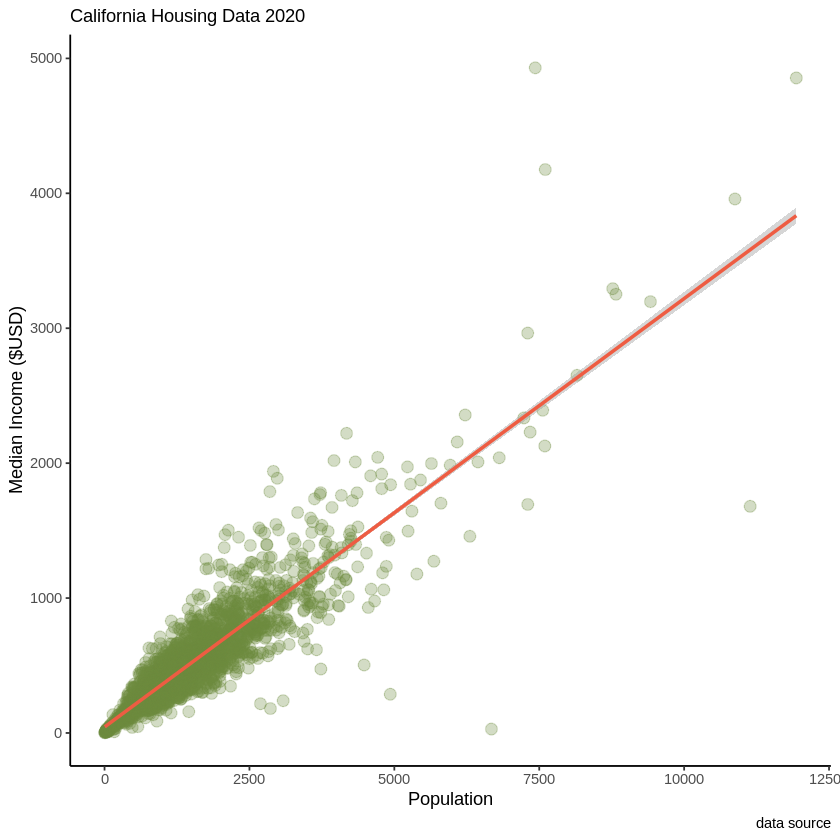

In [ ]:
#create a scatterplot
income_population <- df %>%
ggplot(aes(x= population, y = households))+
  geom_point(size = 3, alpha = 0.3, color = "darkolivegreen4") + #alpha provides transparency  
  geom_smooth(method = lm, color = "tomato2")+
  labs(x = "Population",
       y = "Median Income ($USD)",
       subtitle = "California Housing Data 2020",
       caption = "data source") +
  theme_classic()  #theme with only axes present
  
income_population #print

It may be easier to visualize these relationships if we log-transform both axes. 

`geom_smooth()` using formula 'y ~ x'



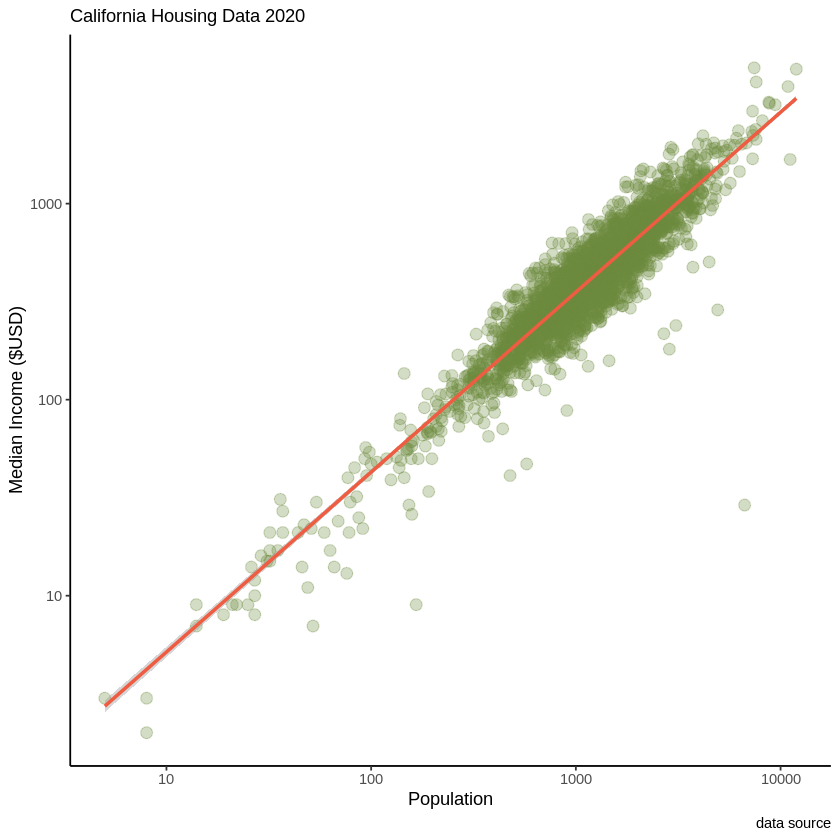

In [ ]:
# create same scatterplot with log(10) transformation to x- and y-axes
income_population <- df %>%
ggplot(aes(x= population, y = households))+
  geom_point(size = 3, alpha = 0.3, color = "darkolivegreen4") + #alpha provides transparency  
  geom_smooth(method = lm, color = "tomato2")+
  scale_x_log10() +
  scale_y_log10() +
  labs(x = "Population",
       y = "Median Income ($USD)",
       subtitle = "California Housing Data 2020",
       caption = "data source") +
  theme_classic()  #theme with only axes present
  
income_population #print

Performing a simple linear regression between one predictor and one response is easy! Just put the response variable first (in this case, frosh_ret), with a tilde ~ following by the predictor variable, as so. Don't forget to list the dataframe (df).

In [ ]:
# simple linear regression
frosh_ret_accept <- lm(frosh_ret ~ accept, df) #defines new variable as linear regression
summary(frosh_ret_accept) #report


Call:
lm(formula = frosh_ret ~ accept, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-31.592  -3.376   3.665   6.151  12.611 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 96.31876    2.98157  32.305  < 2e-16 ***
accept      -0.24897    0.04975  -5.005 3.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.446 on 83 degrees of freedom
Multiple R-squared:  0.2318,	Adjusted R-squared:  0.2226 
F-statistic: 25.05 on 1 and 83 DF,  p-value: 3.09e-06


This linear relationship can be easily visualized using ggplot.

`geom_smooth()` using formula 'y ~ x'



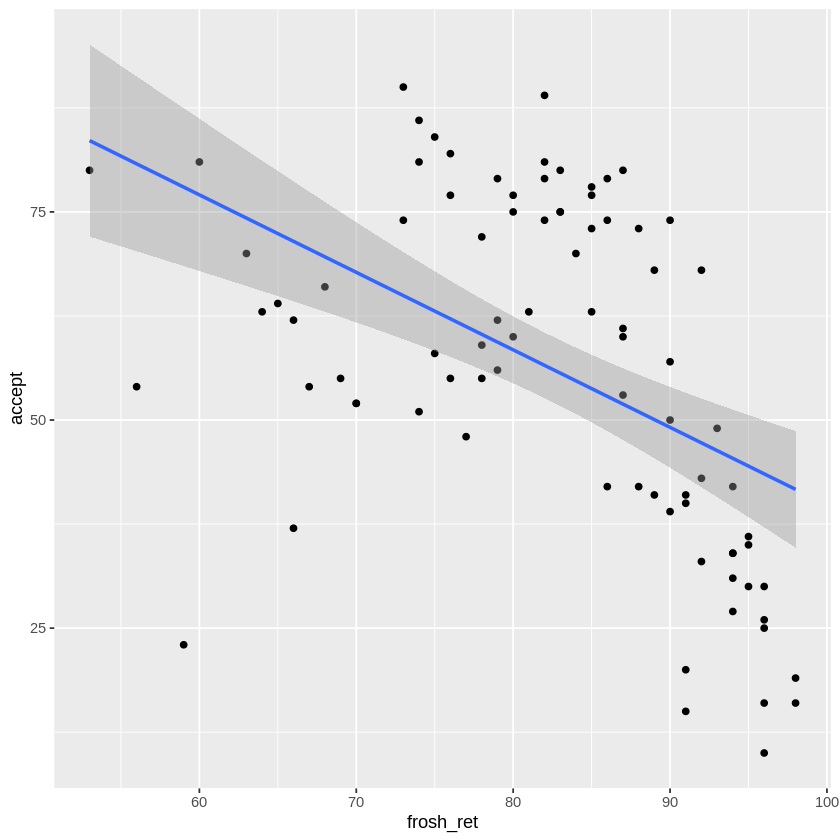

In [ ]:
df %>%
ggplot(aes(frosh_ret, accept)) +
geom_point() +
geom_smooth(method = "lm")

If we want to perform multiple linear regressions (i.e. more than one predictor variable, we *add* the variables in the equation.

If we want to explore the interactions between variables using multiple linear regression, we call the same function *lm()* with the square (^2) function arouond the predictor variables.

In [ ]:
# multiple linear regression
summary( #provide table with results
  lm(frosh_ret ~ (accept + enroll + small_class) ^ 2, # ^2 explores all interactions between variables
  data = df)
  )


Call:
lm(formula = frosh_ret ~ (accept + enroll + small_class)^2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-26.287  -3.654   2.234   6.500  12.836 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)         6.089e+01  2.543e+01   2.395    0.019 *
accept             -3.195e-03  3.599e-01  -0.009    0.993  
enroll              2.904e-03  4.889e-03   0.594    0.554  
small_class         4.315e-01  3.602e-01   1.198    0.235  
accept:enroll       2.290e-05  5.270e-05   0.434    0.665  
accept:small_class -3.591e-03  4.769e-03  -0.753    0.454  
enroll:small_class -9.727e-06  5.867e-05  -0.166    0.869  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.162 on 78 degrees of freedom
Multiple R-squared:  0.3209,	Adjusted R-squared:  0.2686 
F-statistic: 6.142 on 6 and 78 DF,  p-value: 2.623e-05


# Assignment 3

1.	Briefly (in no more than three sentences) describe the variables in your analysis.  Provide a table to support your summary that presents important descriptive statistics.

In [ ]:
# provide table for variables
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             85    
Number of columns          5     
_______________________          
Column type frequency:           
  character                1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 college               0             1    17    44     0       84          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   mean    sd    p0    p25    p50   p75
1 frosh_ret             0             1   82.3  10.7  53.0   76     84      91
2 accept                0             1   56.3  20.7  10     41     59.0    74
3 enroll                0             1 1865.  974.  341   120

DESCRIBE

2.	Examine bivariate scatterplots of FROSH_RET versus each of your predictors.  In two or three sentences describe what you see in these plots.

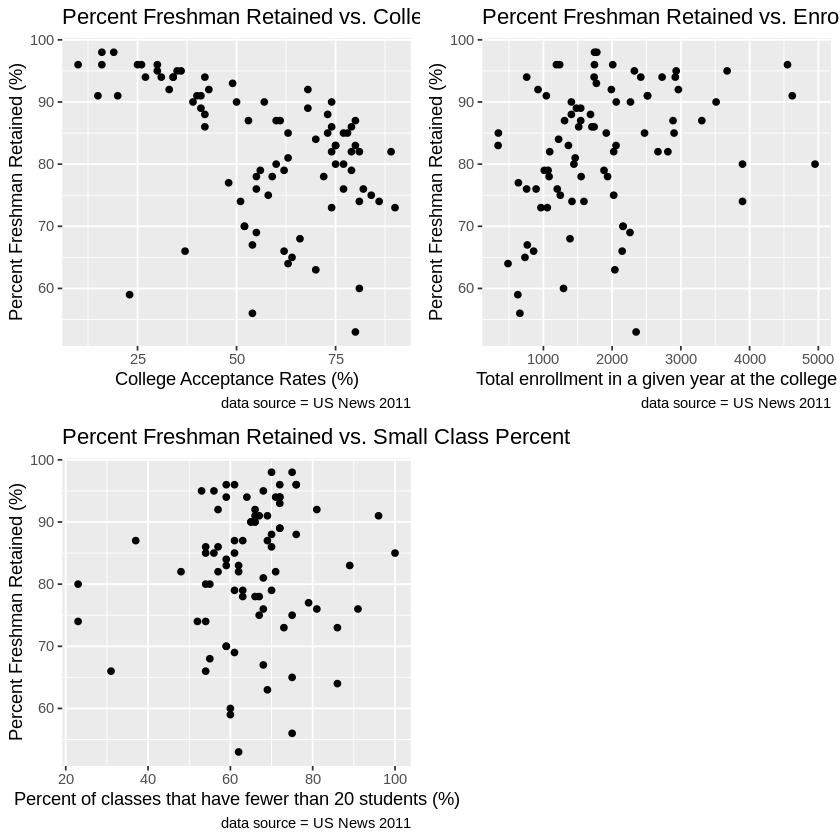

In [ ]:
# make individual scatterplots, then arrange later
p1 <- df %>%
ggplot(aes(y = frosh_ret, x = accept)) +
geom_point() +
labs(title = "Percent Freshman Retained vs. College Acceptance Rates",
caption = "data source = US News 2011",
x = "College Acceptance Rates (%)",
y = "Percent Freshman Retained (%)")

p2 <- df %>%
ggplot(aes(y = frosh_ret, x = enroll)) +
geom_point() +
labs(title = "Percent Freshman Retained vs. Enrollment",
caption = "data source = US News 2011",
x = "Total enrollment in a given year at the college",
y = "Percent Freshman Retained (%)")

p3 <- df %>%
ggplot(aes(y = frosh_ret, x = small_class)) +
geom_point() +
labs(title = "Percent Freshman Retained vs. Small Class Percent",
caption = "data source = US News 2011",
x = "Percent of classes that have fewer than 20 students (%)",
y = "Percent Freshman Retained (%)")

grid.arrange(p1, p2, p3, ncol = 2) #arrange. uses library(gridExtra)

# Practice

## Plotting

**bold text**## Regression